In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

data_file = r"C:\Users\Barbara\Documents\Radboud uni\Internship at Francesco's lab\Programming Davide\Jupyter\neural_data.pickle"
filehandler = open(data_file, 'rb')
neural_data = pickle.load(filehandler)
filehandler.close()

In [3]:
tr = neural_data['traces']

size of correlation matrix is  (132, 132)


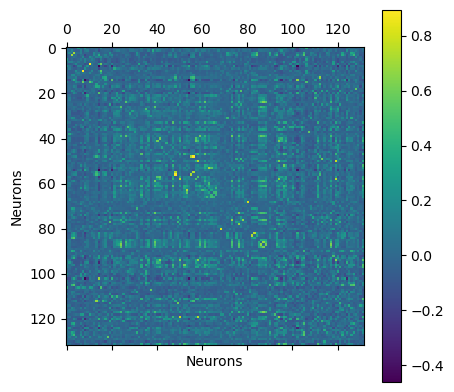

In [50]:
#compute correlation of existing array
cormat = np.corrcoef(tr)
np.fill_diagonal(cormat,0)

print("size of correlation matrix is ", cormat.shape)

plt.matshow(cormat)
plt.colorbar()
plt.xlabel("Neurons")
plt.ylabel("Neurons")
plt.show()

In [4]:
def randomize_traces(tr):
    randomized_tr = np.zeros_like(tr)
    #zeros_like() function in Python is used to return an array of zeros ( 0 ) 
    #with the same shape and data type as the array passed to it
    for i,vec in enumerate(tr):
        rand_shift = np.random.choice(np.arange(len(vec))) 
        #Generates a random sample from a given 1-D array
        randomized_tr[i,:] = np.roll(vec,rand_shift) 
        #Roll array elements along a given axis
        
    return randomized_tr

In [6]:
r_tr = randomize_traces(tr)

In [7]:
tr.shape

(132, 29000)

In [1]:
?np.arange

Object `np.arange` not found.


In [40]:
def compute_null_corr_distr(tr,n_shuff=10):
    '''
    Takes the array of the neural traces (n_neurons x n_timepoints) and (optionally) the number of shuffles.
    Returns an array with the distirbution of correlations on the shuffled data.
    '''
    shuff_corr = []
    for _ in range(n_shuff):
        r_tr = randomize_traces(tr)
        rcormat = np.corrcoef(r_tr)
        np.fill_diagonal(cormat,0)
        flat_rcormat = list(rcormat[np.triu_indices_from(rcormat,k=1)])
        shuff_corr = shuff_corr + flat_rcormat #joins the lists, not sums up

    shuff_corr = np.asarray(shuff_corr)
    
    return shuff_corr
    

In [41]:
null_corrs = compute_null_corr_distr(tr,n_shuff=20)
print(len(null_corrs))

172920


In [49]:
th5 = np.percentile(null_corrs,5)
th95 = np.percentile(null_corrs,95)

In [54]:
mat_indices

(array([  0,   0,   0, ..., 129, 129, 130]),
 array([  1,   2,   3, ..., 130, 131, 131]))

In [55]:
mat_indices = np.triu_indices_from(cormat,k=1)
flat_corr = cormat[mat_indices]

pos_corr = []
neg_corr = []
for i,c in enumerate(flat_corr):
    if c> th95:
        pos_corr.append((mat_indices[0][i],mat_indices[1][i]))
    elif c < th5:
        neg_corr.append((mat_indices[0][i],mat_indices[1][i]))
        
    

In [59]:
len(mat_indices)

2

In [60]:
print(f'fraction of positive correlated pairs: {len(pos_corr)/len(mat_indices[0])}')
print(f'fraction of negative correlated pairs: {len(neg_corr)/len(mat_indices[0])}')


fraction of positive correlated pairs: 0.243118204950266
fraction of negative correlated pairs: 0.12456627342123526


size of correlation matrix is  (132, 132)


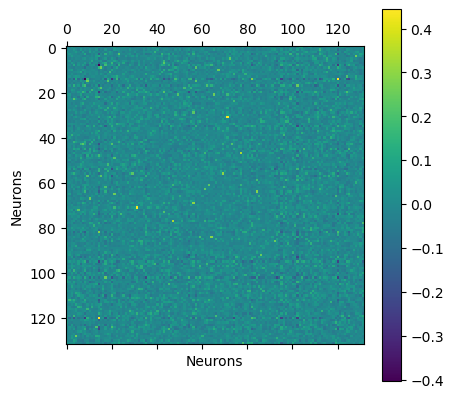

In [53]:
#compute correlation of shuffled array
rcormat = np.corrcoef(r_tr)
np.fill_diagonal(cormat,0)

print("size of correlation matrix is ", cormat.shape)

plt.matshow(cormat)
plt.colorbar()
plt.xlabel("Neurons")
plt.ylabel("Neurons")
plt.show()